In [1]:
import pandas as pd
import numpy as np
import sqlite3
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bokeh.charts import Scatter, output_file, show, Line
from bokeh.plotting import figure, show, output_notebook

database = '/Users/Maureen/Downloads/database.sqlite'
con = sqlite3.connect(database)

#Grab data on EPL and BL1 players from 2011/12 - 2015/16 seasons

data = '''SELECT p.player_name, t.team_long_name, l.name,
            pa.overall_rating, pa.potential, pa.free_kick_accuracy, m.season
            FROM Player_Attributes pa
            JOIN Player p
            ON pa.player_api_id = p.player_api_id
            JOIN Match m
            ON (p.player_api_id = m.away_player_1 OR p.player_api_id = m.away_player_2
            OR p.player_api_id = m.away_player_3 OR p.player_api_id = m.away_player_4 
            OR p.player_api_id = m.away_player_5 OR p.player_api_id = m.away_player_6 
            OR p.player_api_id = m.away_player_7 OR p.player_api_id = m.away_player_8 
            OR p.player_api_id = m.away_player_9 OR p.player_api_id = m.away_player_10 
            OR p.player_api_id =  m.away_player_11)
            JOIN League l
            ON m.league_id = l.id
            JOIN Team t
            ON m.away_team_api_id = t.team_api_id
            WHERE (m.season = '2015/2016' OR m.season = '2014/2015' OR m.season = '2013/2014' 
            OR m.season = '2012/2013' OR m.season = '2011/2012')
            AND (l.name = 'Germany 1. Bundesliga' OR l.name = 'England Premier League')
            '''

df = pd.read_sql_query(data, con=con).drop_duplicates()
df.head()

,player_name,team_long_name,name,overall_rating,potential,free_kick_accuracy,season
0,Richard Stearman,Wolverhampton Wanderers,England Premier League,64.0,73.0,32.0,2011/2012
1,Richard Stearman,Wolverhampton Wanderers,England Premier League,65.0,69.0,32.0,2011/2012
3,Richard Stearman,Wolverhampton Wanderers,England Premier League,65.0,73.0,32.0,2011/2012
4,Richard Stearman,Wolverhampton Wanderers,England Premier League,66.0,73.0,32.0,2011/2012
8,Richard Stearman,Wolverhampton Wanderers,England Premier League,68.0,73.0,32.0,2011/2012


In [11]:
#Clean up the column names, and calculate means
cols = ['Player', 'Team', 'League', 'Overall_Rating', 'Potential', 'Free_Kick_Accuracy', 'Season']
df_teams = df.copy()
df_teams.columns = cols
df_teams = df_teams.groupby(['League', 'Season','Team']).mean().reset_index(drop=False)
df_teams.head(50)

,League,Season,Team,Overall_Rating,Potential,Free_Kick_Accuracy
0,England Premier League,2011/2012,Arsenal,77.046296,81.858025,55.629630
1,England Premier League,2011/2012,Aston Villa,73.423529,77.761765,46.791176
2,England Premier League,2011/2012,Blackburn Rovers,70.820069,75.529412,46.487889
3,England Premier League,2011/2012,Bolton Wanderers,70.666667,75.093851,47.825243
4,England Premier League,2011/2012,Chelsea,79.146497,82.117834,57.054140
5,England Premier League,2011/2012,Everton,75.650000,79.288889,55.788889
6,England Premier League,2011/2012,Fulham,73.605016,77.297806,53.009404
7,England Premier League,2011/2012,Liverpool,76.657895,80.809211,56.266447
8,England Premier League,2011/2012,Manchester City,80.701695,84.084746,62.132203
9,England Premier League,2011/2012,Manchester United,78.835329,82.628743,53.859281


In [8]:
#Change Season from string to int
df_teams['Year'] = df_teams.Season.str[:4].apply(int)
df_teams.head()

,League,Season,Team,Overall_Rating,Potential,Free_Kick_Accuracy,Year
0,England Premier League,2011/2012,Arsenal,77.046296,81.858025,55.629630,2011
1,England Premier League,2011/2012,Aston Villa,73.423529,77.761765,46.791176,2011
2,England Premier League,2011/2012,Blackburn Rovers,70.820069,75.529412,46.487889,2011
3,England Premier League,2011/2012,Bolton Wanderers,70.666667,75.093851,47.825243,2011
4,England Premier League,2011/2012,Chelsea,79.146497,82.117834,57.054140,2011


In [100]:
#Get top 3 teams for each year by League
# Convert seasons from string to int
df_teams['Year'] = df_teams.Season.str[:4].apply(int)

#Identify the leagues
epl_only = (df_teams.League == 'England Premier League')
bl_only = (df_teams.League == 'Germany 1. Bundesliga')

#split them into 2 df's. I couldnt figure out how to get each group's top 3. So I split by league
epl = df_teams[epl_only]
bl = df_teams[bl_only]

#Sort and groupby, pick top 3
epl_top = epl.groupby(['Year','League','Team','Potential','Free_Kick_Accuracy']).mean().Overall_Rating.groupby(level=0, group_keys=False).nlargest(3)
bl_top = bl.groupby(['Year','League','Team','Potential','Free_Kick_Accuracy']).mean().Overall_Rating.groupby(level=0, group_keys=False).nlargest(3)

#put them back together
top_teams = [epl_top, bl_top]
top3 = pd.concat(top_teams).reset_index(drop=False)

top3.head(30)

,Year,League,Team,Potential,Free_Kick_Accuracy,Overall_Rating
0,2011,England Premier League,Manchester City,84.084746,62.132203,80.701695
1,2011,England Premier League,Chelsea,82.117834,57.054140,79.146497
2,2011,England Premier League,Manchester United,82.628743,53.859281,78.835329
3,2012,England Premier League,Manchester City,84.100000,62.027273,80.357576
4,2012,England Premier League,Manchester United,82.520710,55.100592,78.952663
5,2012,England Premier League,Chelsea,82.347670,56.577061,77.813620
6,2013,England Premier League,Manchester City,83.817881,55.317881,80.096026
7,2013,England Premier League,Chelsea,83.534653,57.574257,79.396040
8,2013,England Premier League,Manchester United,82.775956,54.852459,78.677596
9,2014,England Premier League,Manchester City,83.431438,54.742475,79.595318


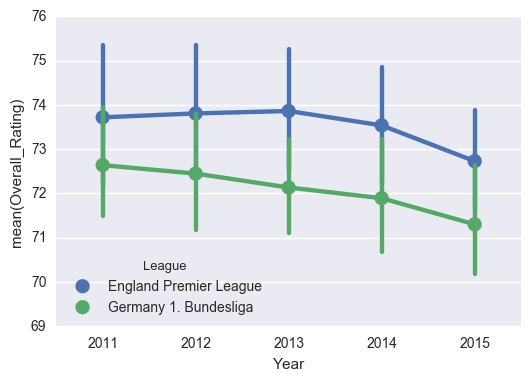

In [42]:
#Compare the averages of each league, all teams included. Not just top 3 per year
sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Overall_Rating", hue='League',data=df_teams, legend_out=False)

In [101]:
epl_top = epl_top.reset_index(drop=False)
bl_top = bl_top.reset_index(drop=False)

In [124]:
#Calculate the percent difference between the player potential and rating. Who's not living up to their potential?
pc = (((df_teams['Overall_Rating'] - df_teams['Potential'])/df_teams['Overall_Rating'])*100).round(2)

df_teams['Rating_vs_Potential'] = pc
df_teams.sort_values('Rating_vs_Potential',ascending=True).head(10)

,League,Season,Team,Overall_Rating,Potential,Free_Kick_Accuracy,Year,Rating_vs_Potential
174,Germany 1. Bundesliga,2015/2016,Bayer 04 Leverkusen,71.857143,79.725869,50.861004,2015,-10.95
96,England Premier League,2015/2016,Tottenham Hotspur,72.713793,80.665517,54.886207,2015,-10.94
87,England Premier League,2015/2016,Liverpool,72.389728,80.108761,47.268882,2015,-10.66
156,Germany 1. Bundesliga,2014/2015,Bayer 04 Leverkusen,73.401674,81.087866,53.447699,2014,-10.47
90,England Premier League,2015/2016,Newcastle United,70.931953,78.337278,46.772189,2015,-10.44
181,Germany 1. Bundesliga,2015/2016,FC Schalke 04,72.990164,80.511475,52.098361,2015,-10.30
168,Germany 1. Bundesliga,2014/2015,SV Werder Bremen,70.116402,76.968254,51.346561,2014,-9.77
186,Germany 1. Bundesliga,2015/2016,SV Werder Bremen,69.637993,76.372760,52.931900,2015,-9.67
187,Germany 1. Bundesliga,2015/2016,TSG 1899 Hoffenheim,70.892430,77.721116,51.219124,2015,-9.63
176,Germany 1. Bundesliga,2015/2016,Borussia Mönchengladbach,71.598802,78.176647,48.763473,2015,-9.19


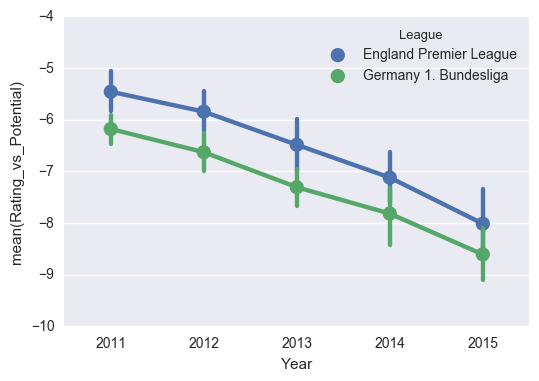

In [126]:
#Players not living up to their potential. The lower the number, the more they're not performing
sns.pointplot(x="Year", y="Rating_vs_Potential", hue='League',data=df_teams)

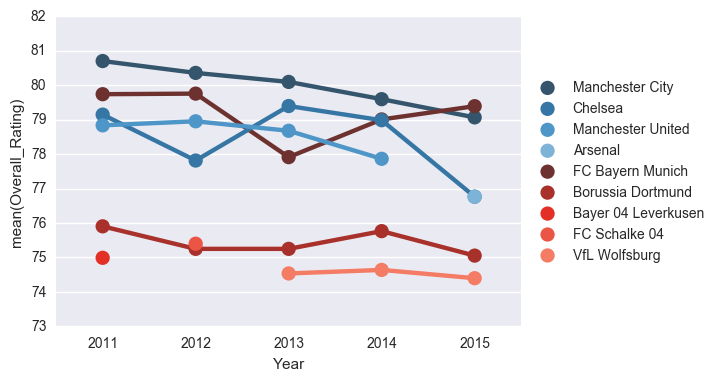

In [105]:
#averages of top 3 teams of each league.

sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Overall_Rating", hue='Team', palette='Blues_d',data=epl_top)
sns.pointplot(x="Year", y="Overall_Rating", hue='Team', palette='Reds_d',data=bl_top)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

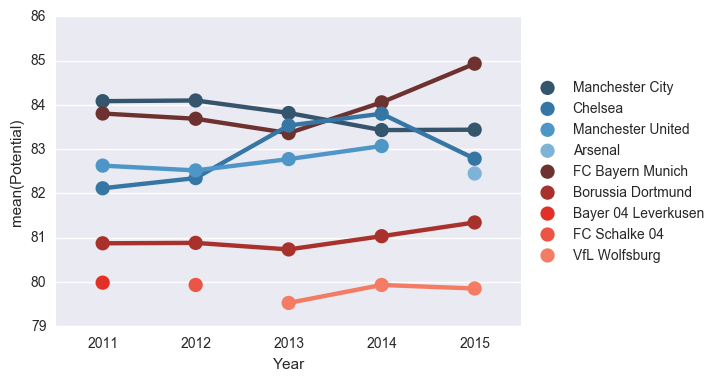

In [108]:
sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Potential", hue='Team', palette='Blues_d',data=epl_top)
sns.pointplot(x="Year", y="Potential", hue='Team', palette='Reds_d',data=bl_top)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [127]:
output_notebook()

p = Scatter(top3, x='Year', y='Overall_Rating', title="Ratings by Year",
            xlabel="Year", ylabel="Overall Rating", marker='Team', color='League')
show(p, notebook_handle=True)

Loading BokehJS ...

In [36]:
output_notebook()

p = Scatter(df_teams, x='Year', y='Potential', title="Ratings by Year",
            xlabel="Year", ylabel="Overall Rating", marker='League', color='League')

show(p, notebook_handle=True)

Loading BokehJS ...

In [132]:
from bokeh.charts import Histogram, BoxPlot
from bokeh.models import Range1d, Legend

left, right, bottom, top = 0, 1, 65, 95
b = BoxPlot(df_teams, values='Potential', label='Year', color='League',legend=None)
b.set(y_range=Range1d(bottom,top))
show(b)

In [130]:
left, right, bottom, top = 0, 1, 79, 86
b = top3.sort_values('League')
b = BoxPlot(top3, values='Potential', label='Team', color='League', legend=False)
b.set(y_range=Range1d(bottom,top))
#b.add_layout(legend, 'right')
#b.legend.location='top_right'
show(b)

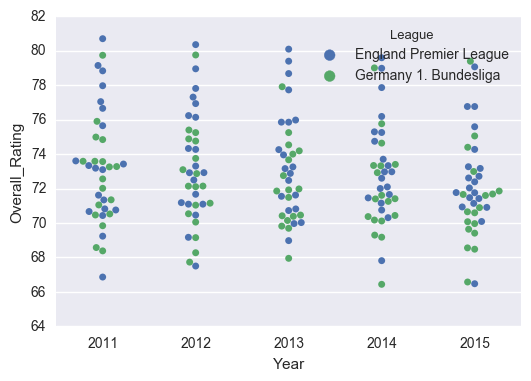

In [23]:
#Team player's overall averages by year
ax = sns.swarmplot(x="Year", y="Overall_Rating", hue='League',data=df_teams)